## **Clothing Identifier using Keras**

### Imports

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

### Dataset
We are using MNIST Fashion Dataset found in keras.
<br> Contains 60,000 images for training and 10,000 images for validation/testing.

In [2]:
fashion_mnist = keras.datasets.fashion_mnist  # load dataset

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()  # split into testing and training

Check on the data we are working with:

In [3]:
train_images.shape

(60000, 28, 28)

^ This means we have 60,000 images that are made up of 28x28 pixels (784 pixels in total per image).
<br><br>Now let's look at one pixel: 

In [4]:
train_images[0,23,23]

194

^ Our pixel values are between 0 and 255, 0 being black and 255 being white. We have a grayscale image as there are no color channels.

In [5]:
train_labels[:10]  # let's have a look at the first 10 training labels

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

The labels are integers ranging from 0 - 9. Each integer represents a specific article of clothing. To create an array of label names to indicate which is which:

In [9]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

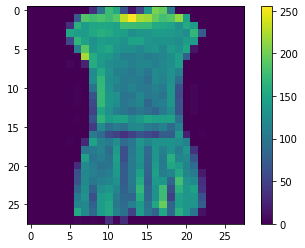

In [7]:
plt.figure()
plt.imshow(train_images[3])
plt.colorbar()
plt.grid(False)
plt.show()

### Data Preprocessing

In [4]:
train_images = train_images / 255.0
test_images = test_images / 255.0
# easier for our models to work with smaller numbers i.e. [0,1]

### Model Building
We are using keras sequential model with three different layers.
<br> Feed-forward neural network (one that passes values from left to right).

In [5]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
    keras.layers.Dense(128, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(10, activation='softmax') # output layer (3)
])

**Layer 1:** This is our input layer and it will conist of 784 neurons. We use the flatten layer with an input shape of (28,28) to denote that our input should come in in that shape. The flatten means that our layer will reshape the shape (28,28) array into a vector of 784 neurons so that each pixel will be associated with one neuron.

**Layer 2:** This is our first and only hidden layer. The dense denotes that this layer will be fully connected and each neuron from the previous layer connects to each neuron of this layer. It has 128 neurons and uses the rectify linear unit activation function.

**Layer 3:** This is our output later and is also a dense layer. It has 10 neurons that we will look at to determine our models output. Each neuron represents the probabillity of a given image being one of the 10 different classes. The activation function softmax is used on this layer to calculate a probabillity distribution for each class. This means the value of any neuron in this layer will be between 0 and 1, where 1 represents a high probabillity of the image being that class.

### Compiling Model
Loss function, optimizers and metrics

In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Model Training and Evaluation

In [7]:
model.fit(train_images, train_labels, epochs=15)  # we pass the data, labels and epochs and watch the magic!

Epoch 1/15
1875/1875 [==============================] - 2s 951us/step - loss: 0.5012 - accuracy: 0.8235
Epoch 2/15
1875/1875 [==============================] - 2s 887us/step - loss: 0.3750 - accuracy: 0.8657
Epoch 3/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3389 - accuracy: 0.8773
Epoch 4/15
1875/1875 [==============================] - 2s 943us/step - loss: 0.3142 - accuracy: 0.8844
Epoch 5/15
1875/1875 [==============================] - 2s 983us/step - loss: 0.2960 - accuracy: 0.8903
Epoch 6/15
1875/1875 [==============================] - 2s 957us/step - loss: 0.2835 - accuracy: 0.8941
Epoch 7/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2700 - accuracy: 0.8990
Epoch 8/15
1875/1875 [==============================] - 2s 963us/step - loss: 0.2588 - accuracy: 0.9033
Epoch 9/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2491 - accuracy: 0.9068
Epoch 10/15
1875/1875 [==============================] - 2s 996us/step

Verbose argument is defined from the keras documentation as: "verbose: 0 or 1. Verbosity mode. 0 = silent, 1 = progress bar."

In [8]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) 
print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 851us/step - loss: 0.3429 - accuracy: 0.8854
Test accuracy: 0.8853999972343445


You'll likely notice that the accuracy here is lower than when training the model. This difference is reffered to as **overfitting**.

And now we have a trained model that's ready to use to predict some values!

### Making Predictions

In [11]:
predictions = model.predict(test_images)
# array of predictions based on each image that was passed into it.

In [12]:
predictions[0]

array([2.1621693e-06, 1.9605459e-10, 1.0790349e-09, 5.6246032e-12,
       7.3686066e-09, 1.1431437e-04, 1.0867054e-06, 4.6860552e-03,
       5.9437692e-08, 9.9519628e-01], dtype=float32)

If we want to get the value with the highest score we can use a useful function from numpy called **argmax()**. This simply returns the index of the maximium value from a numpy array.

In [17]:
print("The predicted clothing is:", class_names[np.argmax(predictions[30])])

The predicted clothing is: Bag


In [18]:
print("The correct answer is:", class_names[test_labels[30]])

The correct answer is: Bag


### Verifying Predictions

Functions:

In [33]:
COLOR = 'black'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

# function to predict the image input using the created model and compare ot the correct label
def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]
  show_image(image, class_names[correct_label], predicted_class)
  
# define show_image fucntion to be used in the predict function
def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()
  
def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")     

Prediction Time :)

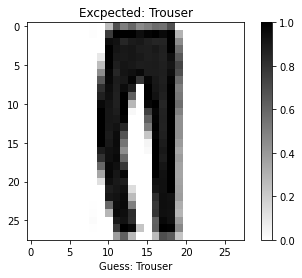

In [34]:
num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)